In [ ]:
"""
Name: Ethan Ling
Email: ethan.ling95@myhunter.cuny.edu
Pod: Rear Left
"""

# Capstone project proposal

## 1. Title

Seasonal Spending Trends and Anomaly Detection in U.S. Consumer Behavior

## 2. Overview

Part of understanding economic shifts is by first grasping the knowledge of how consumer spending habits tend to change throughout different places and time and they can create seasonal patterns or significant anomalies in an economic standpoint. Throughout this project, we'll examine consumer spending data by zip code and it'll be adjusted to analyze how consumer behavior can vary from different states and time. These concepts are crucial for both a business aspect and a policy one as understanding economic patterns allows us to understand trends which can effect spending power from users or even organizations. 

## 3. Background

Before we dive into this project, it's important that we understand economic health of regions and predicting potential shifts in economy. Consumer spending is one of the primary drivers of economic growth, which accounts for a signification portion of GDP. It reflects how much individuals and households are spending on goods and services, which changes the patterns which can provide insights into economic conditions. Which leads to Anomaly detection, which identifies unexpected changes in patterns that could signal shifts in economic conditions or resposnses to events which could lead to new patterns. Which leads to understanding common statistical techniques such as mean absolute error and root mean squared error which are essential tools for modeling typical spending and identifying deviations. By leveraging these techniques, this project will contribute to economic research on spending behavior. 


## 4. Data sources

In [1]:
import pandas as pd
raw_df = pd.read_csv('Percent_Change_in_Consumer_Spending_20241026.csv')
raw_df.head()


,State FIPS code,Date,All merchant category codes spending,Accommodation and food service (ACF) spending,"Arts, entertainment, and recreation (AER) spending",General merchandise stores (GEN) and apparel and accessories (AAP) spending,Grocery and food store (GRF) spending,Health care and social assistance (HCS) spending,Transportation and warehousing (TWS) spending,"Retail spending, including grocery (AAP, CEC, GEN, GRF, HIC, ETC, SGH)","Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)"
0,900,01/13/2020,-2.300,-6.04,-12.3,-5.390,-3.470,-3.17,-2.550,-3.570,-3.690
1,2500,01/13/2020,-0.218,-2.40,-14.0,-2.260,0.375,3.63,-1.770,0.377,0.299
2,3400,01/13/2020,-0.560,-3.86,-11.6,0.654,-0.622,4.77,1.230,0.227,1.090
3,3600,01/13/2020,-0.381,-3.63,-13.9,-1.450,-0.891,7.92,-0.107,-0.561,-0.276
4,4400,01/13/2020,-1.850,-15.00,-19.1,-5.960,-0.105,1.24,-31.200,-4.510,-9.520


## 5. Analysis

The analysis supports my capstone project on seasonal spending trends and anomaly detection in the U.S. as its using the data by preparing, analyzing and visualizng consumer spending data to uncover deviations and patterns. It starts by parsing through the dates and focusing on relevant spending categories which helps enable identification of seasonal trends across various sectors like retail and healthcare. In terms of pairwise plots and correlation matrices, they help reveal relationships between categories which allows for a baseline of understanding the normal spending behavior which is essential to later on see the anomalies. The EDA further calculates error metrics such as Mean Absolute Error and Root Mean Square Error and based on these models, we can detect the unusual spending. This approach in short, will support our project's goal of understanding how consumer spending varies over time and location, providing valuable insights for both business and policy decisions. 

<Figure size 1200x1000 with 0 Axes>

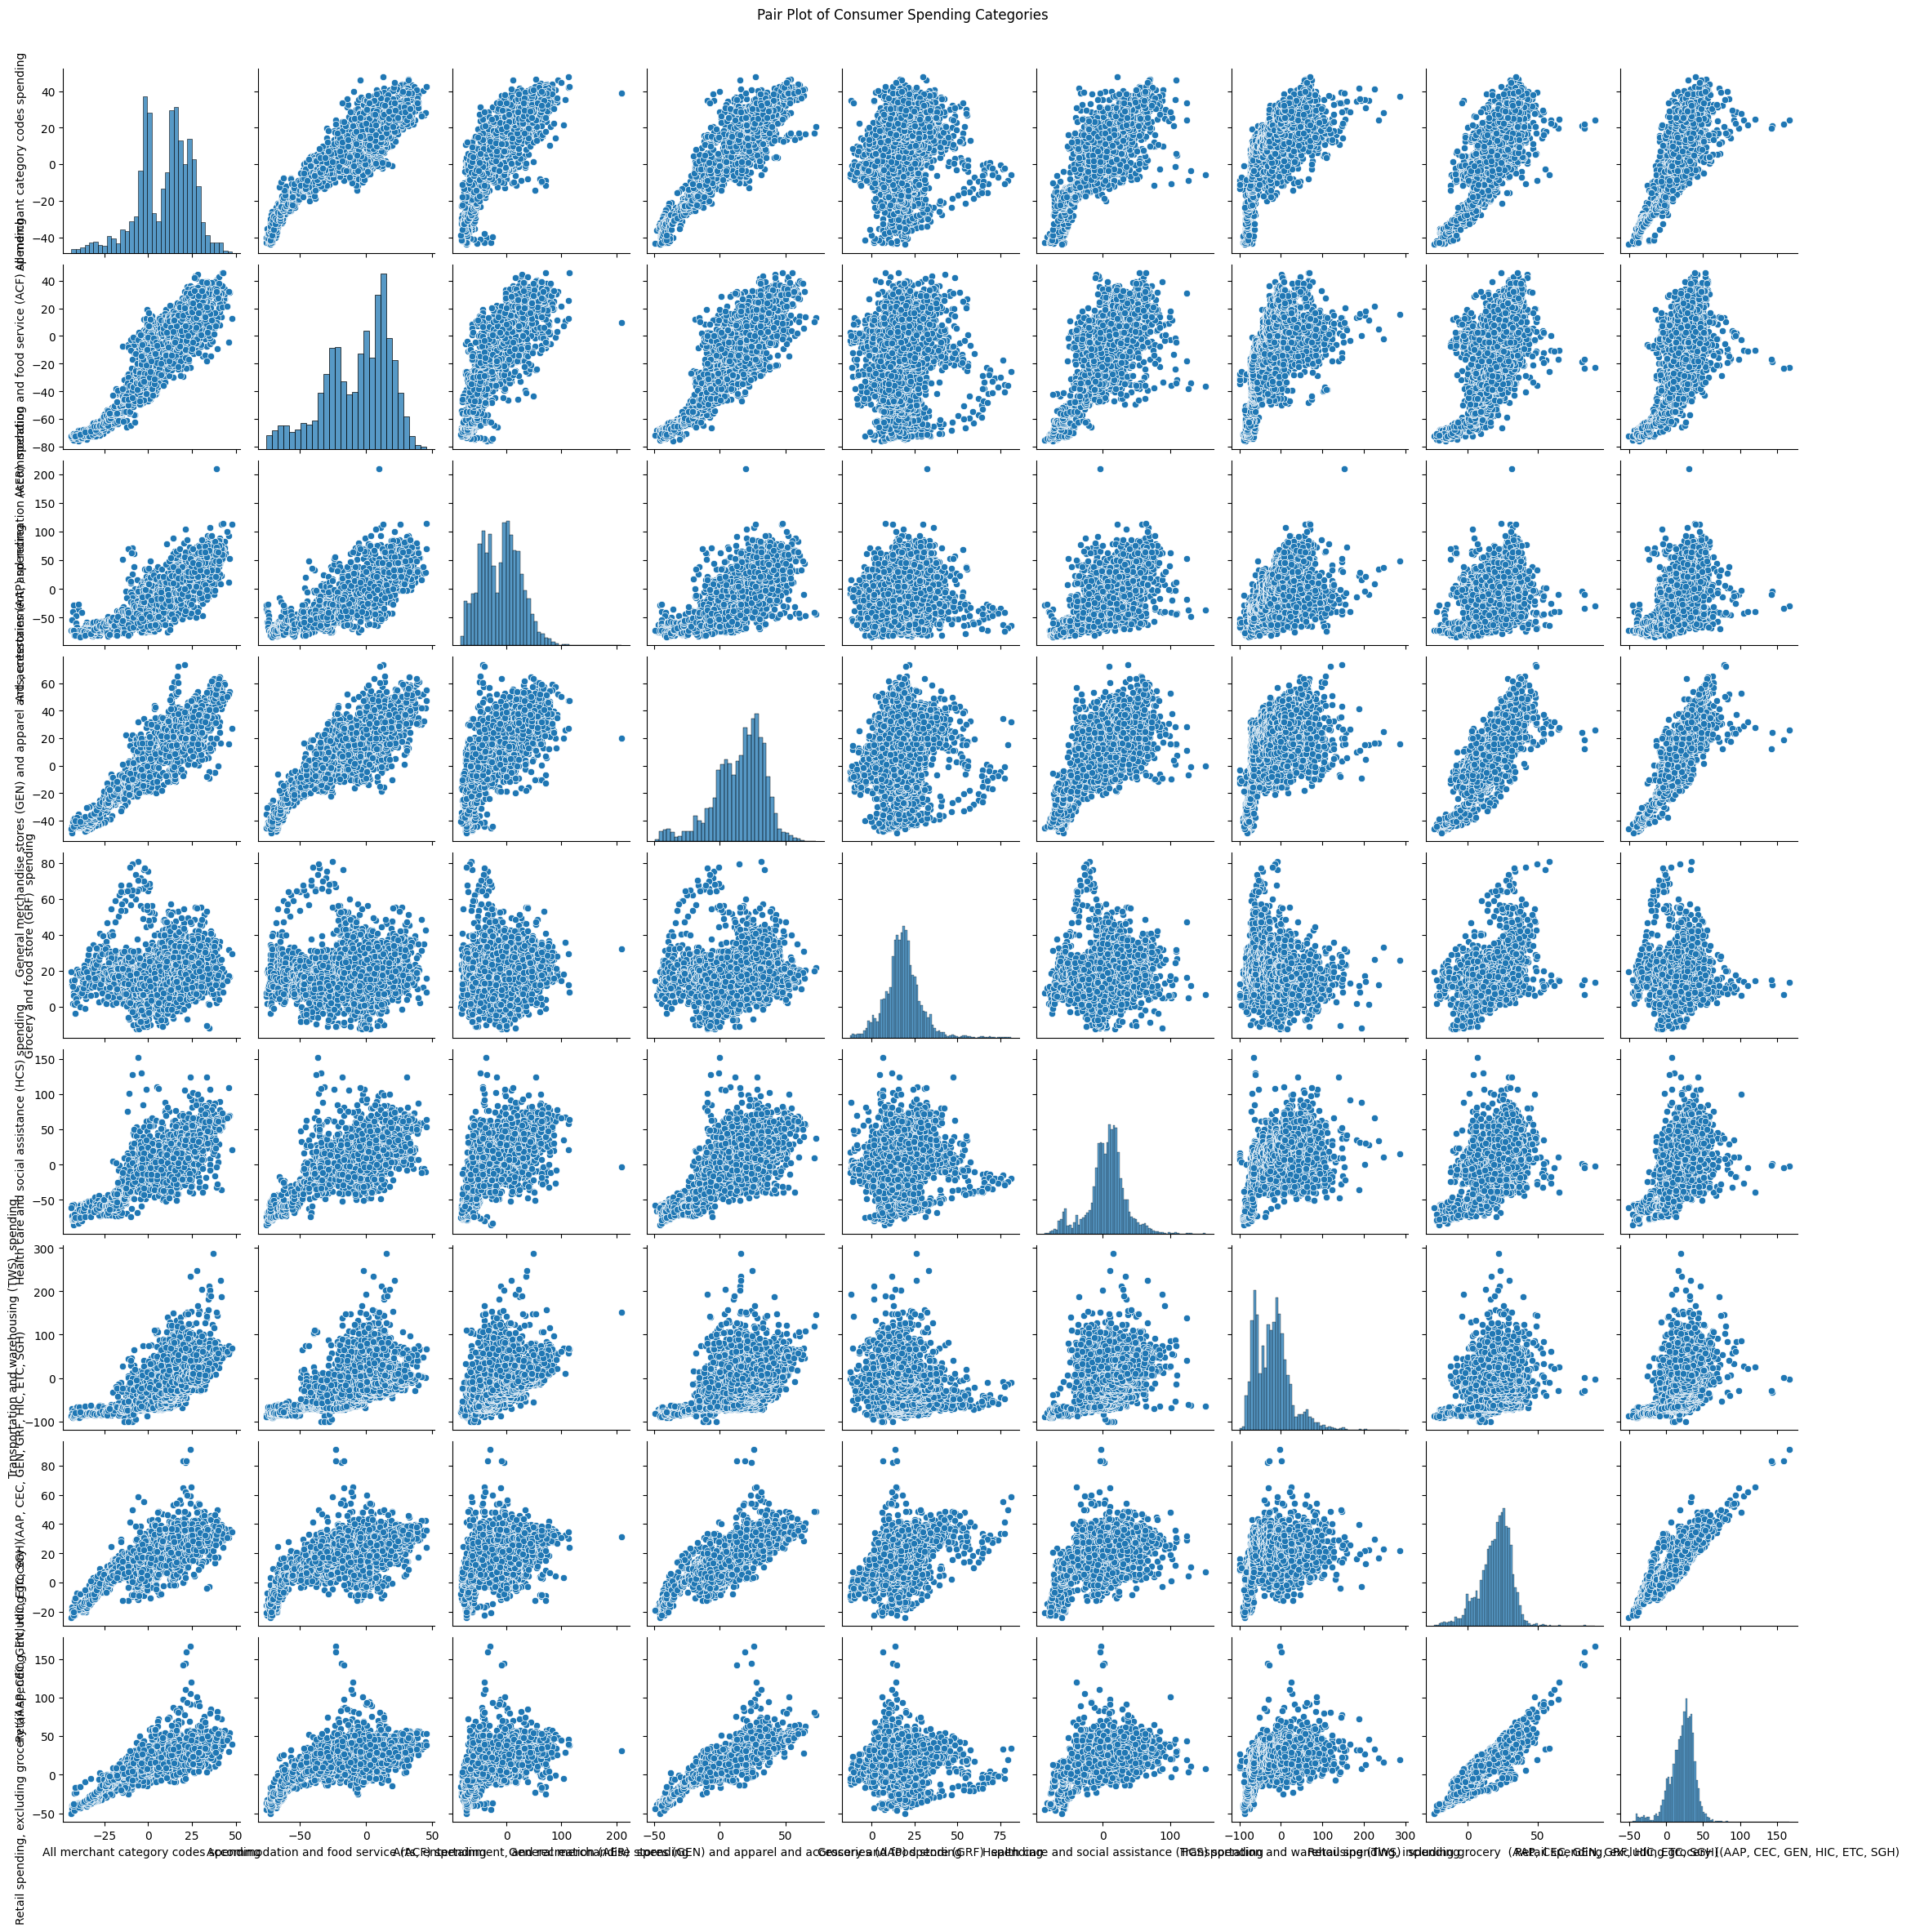

In [3]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

spending_data_path = 'Percent_Change_in_Consumer_Spending_20241026.csv'
spending_df = pd.read_csv(spending_data_path)

spending_df['Date'] = pd.to_datetime(spending_df['Date'], errors='coerce')

numerical_columns = [
    'All merchant category codes spending',
    'Accommodation and food service (ACF) spending',
    'Arts, entertainment, and recreation (AER)  spending',
    'General merchandise stores (GEN) and apparel and accessories (AAP) spending',
    'Grocery and food store (GRF)  spending',
    'Health care and social assistance (HCS) spending ',
    'Transportation and warehousing (TWS)  spending',
    'Retail spending, including grocery  (AAP, CEC, GEN, GRF, HIC, ETC, SGH) ',
    'Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH) '
]

plt.figure(figsize=(12, 10))
sns.pairplot(spending_df[numerical_columns])
plt.suptitle("Pair Plot of Consumer Spending Categories", y=1.02)
plt.show()


correlation = spending_df[ 'All merchant category codes spending',
    'Accommodation and food service (ACF) spending',
    'Arts, entertainment, and recreation (AER)  spending',
    'General merchandise stores (GEN) and apparel and accessories (AAP) spending',
    'Grocery and food store (GRF)  spending',
    'Health care and social assistance (HCS) spending ',
    'Transportation and warehousing (TWS)  spending',
    'Retail spending, including grocery  (AAP, CEC, GEN, GRF, HIC, ETC, SGH) ',
    'Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH) '].corr()

print(correlation)

mean = spending_df['Health care and social assistance (HCS) spending'].mean()
median = spending_df['Health care and social assistance (HCS) spending'].median()


def mae_loss(y_pred, y_true):
  
    return np.mean(np.abs(y_pred - y_true))


def rmse_loss(y_pred, y_true):
  
    return np.sqrt(np.mean((y_pred - y_true) ** 2))




y_true = spending_df['Health care and social assistance (HCS) spending']


y_pred_mean = np.full_like(y_true, mean)  
y_pred_median = np.full_like(y_true, median) 


mean_mae = mae_loss(y_pred_mean, y_true)
mean_rmse = rmse_loss(y_pred_mean, y_true)

median_mae = mae_loss(y_pred_median, y_true)
median_rmse = rmse_loss(y_pred_median, y_true)



print(mean_mae)
print(mean_rmse)

print(median_mae)
print(median_rmse)



def compute_losses(y_true: pd.Series) -> pd.DataFrame:
   
    mae_values = []
    rmse_values = []
    
    
    thetas = np.linspace(0, 1000, 1001)
    
  
    for theta in thetas:
       
        y_pred = np.full_like(y_true, theta)
        
        
        mae = mae_loss(y_pred, y_true)
        rmse = rmse_loss(y_pred, y_true)
        
       
        mae_values.append(mae)
        rmse_values.append(rmse)
    
    
    losses_df = pd.DataFrame({
        'theta': thetas,
        'mae': mae_values,
        'rmse': rmse_values
    })
    
    return losses_df


losses_df = compute_losses(spending_df['Health care and social assistance (HCS) spending'])




sns.lineplot(x='theta', y='mae', data=spending_df, label="MAE")

sns.lineplot(x='theta', y='rmse', data=spending_df, label="RMSE")

plt.ylabel("Loss")
plt.xlabel("Theta")
plt.title("MAE and RMSE Losses for Different Constant Models (Theta)")

plt.show()


## 6. Product

This project will contain an interactive dashboard that will allow users to explore spending trends, view anomaly patterns, and compare states or spending categories. The dashboard will display time series and highlight anomalies with detailed contextualized insights while offering a business analyzation aspect. In addition, users will be able to filter categories like retail, food, and healthcare allowing users to focus on specific types of spending and to observe patterns specific to that sector. Users will be able to explore spending patterns over time to see how different patterns may be the result of certain variables and with this information, they can make future predictions or assumptions. In the end, the dashboard will leverage Python libraries such as Pandas and Scikit-learn for data processing and anomaly detection. Trends and anomalies will be calculated using simple models which will make the dashboard easy and flexible to update. Users can download specified reports as well for selected regions and categories which will allow for flexible insights in reports and projects. The dashboard will be designed in such a way that allows users to have an easy and efficient time when using. We'll simply break down the data by different categories, times and pages. Each page or section of data will have an exportable feature in which they can compare with one another if they choose to do so. In short, the dashboard will bring economic data to life which will provide users with a practical and educational tool to see connections between consumer behavior and economics. 